In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [24]:
bankloans = pd.read_csv("case_study_data.csv")

In [25]:
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
svaing_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

In [9]:
bankloans.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,6,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,3,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,5,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,6,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,6,A124,80,A143,A153,3,A173,3,A191,A201,2


In [11]:
bankloans.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [15]:
bankloans.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In [17]:
#Segregating the numeric and categorical variable names

numeric_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]


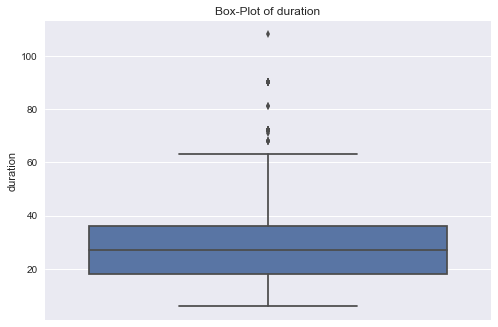

In [19]:
sns.boxplot(y = "duration",data=bankloans)
plt.title("Box-Plot of duration")
plt.show()

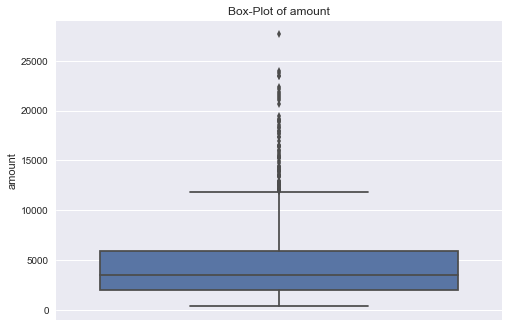

In [22]:
sns.boxplot(y = "amount",data=bankloans)
plt.title("Box-Plot of amount")
plt.show()

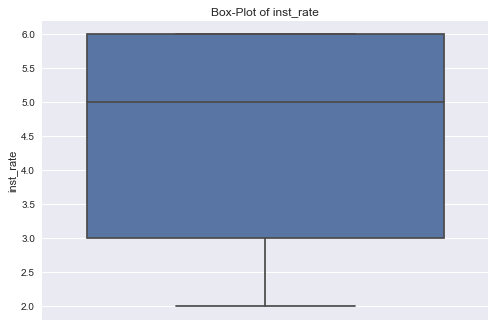

In [33]:
sns.boxplot(y = "inst_rate",data=bankloans)
plt.title("Box-Plot of inst_rate")
plt.show()

In [36]:
bankloans.corr()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
duration,1.000000,0.625128,0.066263,0.024970,-0.037106,-0.026296,-0.024283,0.214668
amount,0.625128,1.000000,-0.272906,0.018909,0.032873,0.016287,0.017143,0.154739
inst_rate,0.066263,-0.272906,1.000000,0.047184,0.056342,0.007988,-0.066704,0.071108
residing_since,0.024970,0.018909,0.047184,1.000000,0.268296,0.102776,0.045624,-0.000139
age,-0.037106,0.032873,0.056342,0.268296,1.000000,0.164017,0.117814,-0.090807
num_credits,-0.026296,0.016287,0.007988,0.102776,0.164017,1.000000,0.117438,-0.044738
dependents,-0.024283,0.017143,-0.066704,0.045624,0.117814,0.117438,1.000000,-0.003015
status,0.214668,0.154739,0.071108,-0.000139,-0.090807,-0.044738,-0.003015,1.000000


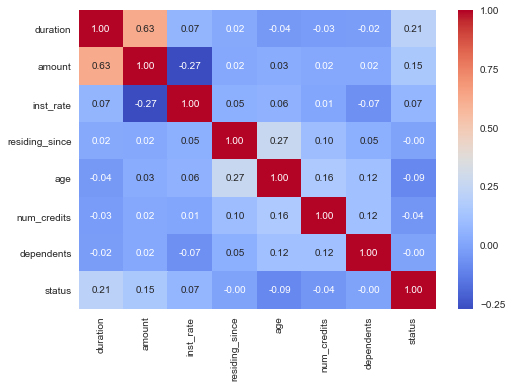

In [38]:
#Visualize the correlation using seaborn heatmap
sns.heatmap(bankloans.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [40]:
bankloans['status'].value_counts()

1    700
2    300
Name: status, dtype: int64

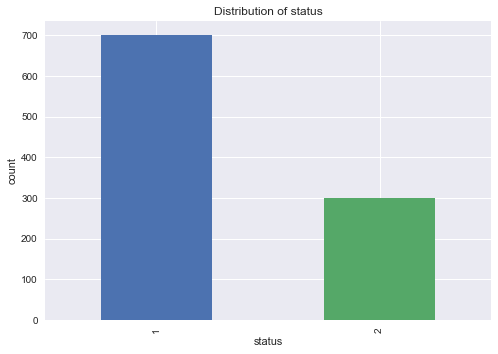

In [41]:
bankloans['status'].value_counts().plot.bar()
plt.xlabel("status")
plt.ylabel("count")
plt.title("Distribution of status")
plt.show()